<a href="https://colab.research.google.com/github/claudiagiraldo/Proyecto/blob/main/03%20-%20modelos%20supervisados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Modelo de prueba: Proyecto Visas**
Por: Claudia Yaneth Giraldo Vergara

C.C. 1001745178

In [13]:
from sklearn import tree 
from sklearn import svm 
import sklearn.linear_model as linear_model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Carga de datos 
url1 = 'https://raw.githubusercontent.com/claudiagiraldo/Proyecto/main/x_train.csv'
x_train = pd.read_csv(url1)
url2 = 'https://raw.githubusercontent.com/claudiagiraldo/Proyecto/main/y_train.csv'
y_train = pd.read_csv(url2)
url3 = 'https://raw.githubusercontent.com/claudiagiraldo/Proyecto/main/x_test.csv'
x_test = pd.read_csv(url3)
url4 = 'https://raw.githubusercontent.com/claudiagiraldo/Proyecto/main/y_test.csv'
y_test = pd.read_csv(url4)

## **Construcción de modelo**

In [3]:
x_train_encode = pd.get_dummies(x_train)
x_test_encode = pd.get_dummies(x_test)

##**Métodos supervisados**

**Métrica:**
La métrica escogida para medir el desempeño de los modelos es el *accuracy*, obtenido a partir de la matriz de confusión. 

**Regresión Logística**

In [4]:
lr_clf = linear_model.LogisticRegression()
lr_clf.fit(x_train, y_train) 

y_pred_lr = lr_clf.predict(x_test)

probs = lr_clf.predict_proba(x_test)

print("test", y_test[:10])
print("pred", y_pred_lr[:10])

print(metrics.confusion_matrix(y_test,y_pred_lr))
print(metrics.classification_report(y_test, y_pred_lr))

test    CASE_STATUS
0            1
1            0
2            1
3            0
4            1
5            0
6            1
7            0
8            0
9            1
pred [0 0 1 1 1 0 1 1 0 1]
[[21  9]
 [14 14]]
              precision    recall  f1-score   support

           0       0.60      0.70      0.65        30
           1       0.61      0.50      0.55        28

    accuracy                           0.60        58
   macro avg       0.60      0.60      0.60        58
weighted avg       0.60      0.60      0.60        58



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Árbol de decisión**

In [5]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)   

y_pred = dtree.predict(x_test)

y_prob = dtree.predict_proba(x_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print()

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

test    CASE_STATUS
0            1
1            0
2            1
3            0
4            1
5            0
6            1
7            0
8            0
9            1
pred [1 0 1 0 1 0 0 0 0 0]

[[24  6]
 [15 13]]
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        30
           1       0.68      0.46      0.55        28

    accuracy                           0.64        58
   macro avg       0.65      0.63      0.62        58
weighted avg       0.65      0.64      0.63        58



**Random Forest**

In [6]:
rf = RandomForestClassifier(n_estimators = 75, random_state = 50)
rf.fit(x_train, y_train)

y_pred_rf =  rf.predict(x_test)
probs = rf.predict_proba(x_test)

print("test", y_test[:10])
print("pred", y_pred[:10])
print(metrics.confusion_matrix(y_test,y_pred_rf))
print(metrics.classification_report(y_test, y_pred_rf))

test    CASE_STATUS
0            1
1            0
2            1
3            0
4            1
5            0
6            1
7            0
8            0
9            1
pred [1 0 1 0 1 0 0 0 0 0]
[[24  6]
 [12 16]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        30
           1       0.73      0.57      0.64        28

    accuracy                           0.69        58
   macro avg       0.70      0.69      0.68        58
weighted avg       0.70      0.69      0.69        58



<ipython-input-6-10dc4202d046>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


El modelo de Random Forest da el mejor rendimiento con un 0.69 en el accuracy

**Gaussian Naive Bayes**

In [7]:
gaus_clf = GaussianNB()
gaus_clf.fit(x_train, y_train)

y_pred_glb = gaus_clf.predict(x_test)
confusion = metrics.confusion_matrix(y_test, y_pred_glb)
print(confusion)
print(metrics.classification_report(y_test, y_pred_glb))

[[ 1 29]
 [ 1 27]]
              precision    recall  f1-score   support

           0       0.50      0.03      0.06        30
           1       0.48      0.96      0.64        28

    accuracy                           0.48        58
   macro avg       0.49      0.50      0.35        58
weighted avg       0.49      0.48      0.34        58



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


El modelo de Gaussian Naive Bayes da el peor rendimiento con un 0.48 de accuracy

**Redes reuronales artificiales**

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20,20,20,20), max_iter=1000)
mlp.fit(x_train, y_train)

y_pred_mlp = mlp.predict(x_test)
confusion = metrics.confusion_matrix(y_test, y_pred_mlp)
print(confusion)
print(metrics.classification_report(y_test, y_pred_mlp))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[22  8]
 [14 14]]
              precision    recall  f1-score   support

           0       0.61      0.73      0.67        30
           1       0.64      0.50      0.56        28

    accuracy                           0.62        58
   macro avg       0.62      0.62      0.61        58
weighted avg       0.62      0.62      0.62        58



In [9]:
def plot_learning_curve(estimator, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Train Score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Test Score')
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

##**Curvas de aprendizaje**

**Curva de aprendizaje para Regresión Logística**

A continuación se estudia el comportamiento de las diferentes curvas de aprendizaje generadas por cada modelo.

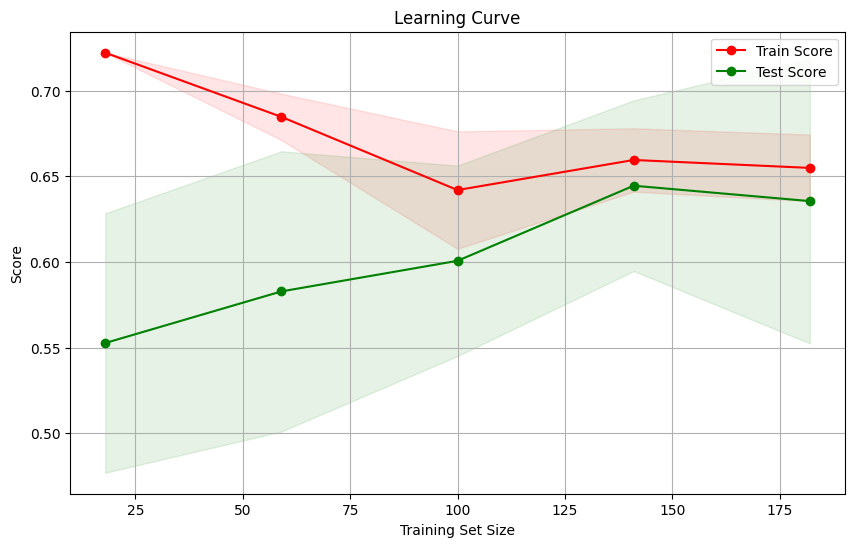

In [14]:
plot_learning_curve(lr_clf, x_train, y_train, cv=5)

Para esta primera curva de aprendizaje se observa un sesgo, esto se puede deber a la simplicidad del modelo.

**Curva de aprendizaje para Árbol de Decisión**

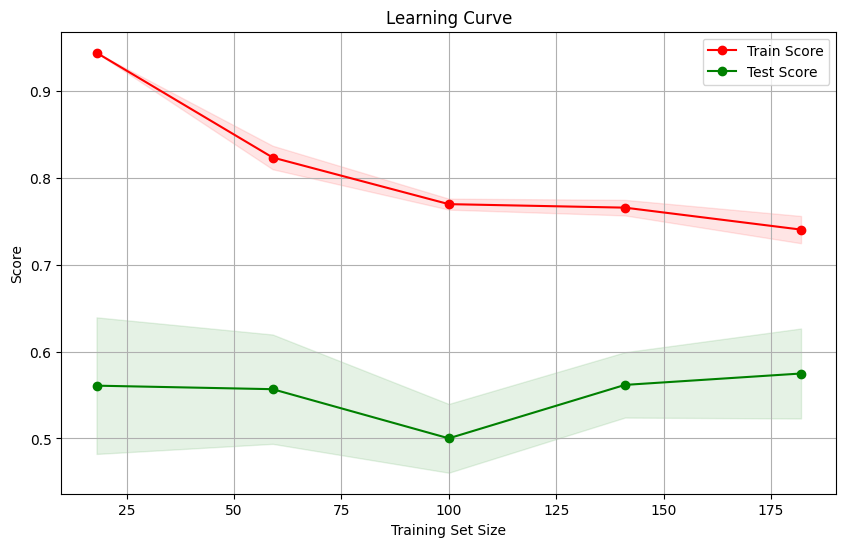

In [15]:
plot_learning_curve(dtree, x_train, y_train, cv=5)

Se observa un overfitting, el modelo tiene buen rendimiento con los datos de entrenamiento pero no funciona bien con los datos de prueba.

**Curva de aprendizaje para Random Forest**

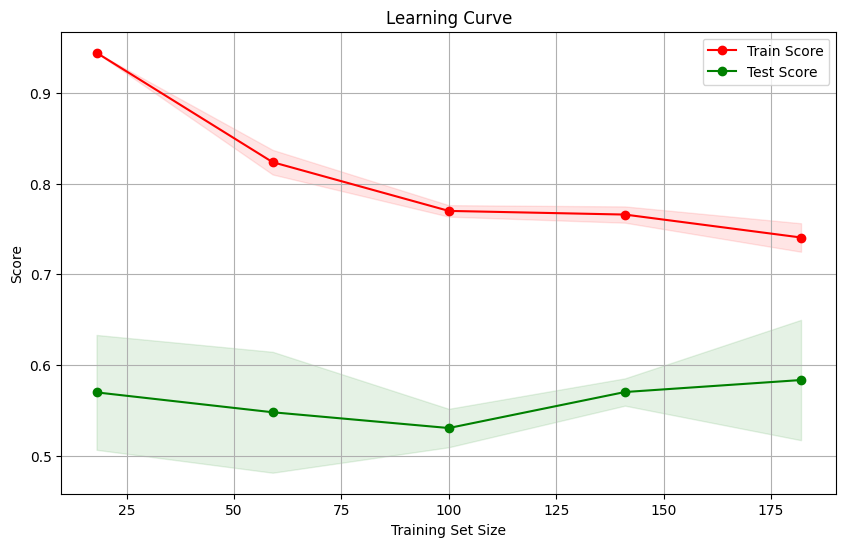

In [16]:
plot_learning_curve(rf, x_train, y_train, cv=5)

El mismo caso que el anterior, se observa un overfitting.

**Curva de aprendizaje para Naives Bayes**


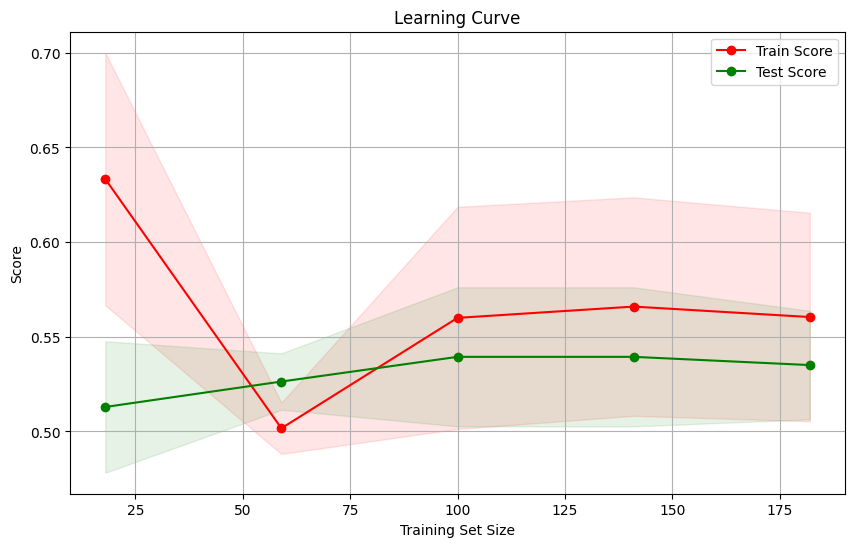

In [17]:
plot_learning_curve(gaus_clf, x_train, y_train, cv=5)

Esta curva de aprendizaje muestra un buen rendimiento del modelo de Naive Bayes, tanto la línea de train como la de test están en un bajo nivel y se estabilizan al tener más de 50 datos.

**Curva de aprendizaje para Redes Neuronales Artificiales**

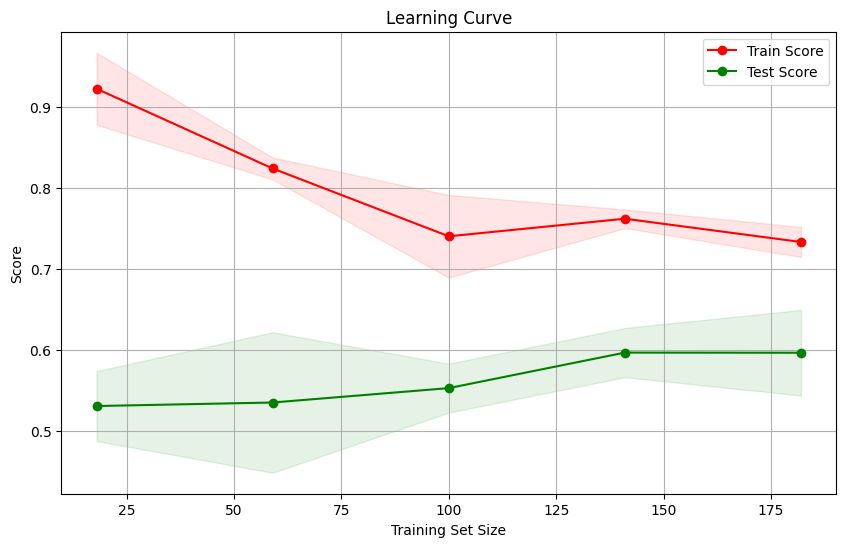

In [18]:
plot_learning_curve(mlp, x_train, y_train, cv=5)

Mismo caso que las curvas de aprendizaje del árbol de decisión y random forest, se observa un overfitting por lo que no se considera un buen modelo para este caso.